# **Importação de dados** 

In [ ]:
import pandas
import seaborn
import numpy
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
dataset = dataset = pandas.read_csv('https://www.inf.ufrgs.br/~cakunas/data/access-pattern-metrics-train.csv')
dataset.head()

Unnamed: 0  file_handles  ...  avg_distance  pattern_description
0          41             1  ...  18116.636719                   SS
1          42             1  ...  18769.839844                   SS
2          43             1  ...  18131.460938                   SS
3          44             1  ...  18571.134766                   SS
4          45             1  ...  19045.716797                   SS

[5 rows x 7 columns]

# **Análise exploratória**



In [ ]:
sc_data = dataset.query('pattern_description == "SC"')
ss_data = dataset.query('pattern_description == "SS"')
fp_data = dataset.query('pattern_description == "FP"')
data_analysis = pandas.DataFrame([], columns=["class", "n_samples", "avg_distance (Máx)", "avg_distance (Mín)", "file_handles (Máx)", "file_handles (Mín)", "min_request_size (Máx)", "min_request_size (Mín)"])
data_analysis.loc[0] = ["SC", len(sc_data), sc_data['avg_distance'].max(), sc_data['avg_distance'].min(), sc_data['file_handles'].max(), sc_data['file_handles'].min(), sc_data['min_request_size'].max(), sc_data['min_request_size'].min()]
data_analysis.loc[1] = ["SS", len(ss_data), ss_data['avg_distance'].max(), ss_data['avg_distance'].min(), ss_data['file_handles'].max(), ss_data['file_handles'].min(), ss_data['min_request_size'].max(), ss_data['min_request_size'].min()]
data_analysis.loc[2] = ["FP", len(fp_data), fp_data['avg_distance'].max(), fp_data['avg_distance'].min(), fp_data['file_handles'].max(), fp_data['file_handles'].min(), fp_data['min_request_size'].max(), fp_data['min_request_size'].min()]
data_analysis.head()

class n_samples  ...  min_request_size (Máx)  min_request_size (Mín)
0    SC     13257  ...                     256                      32
1    SS     13250  ...                     256                       0
2    FP     12405  ...                     256                       0

[3 rows x 8 columns]

# **Estratificação de amostras** 

In [ ]:
feature_names = ['file_handles', 'avg_received_size', 'min_request_size', 'max_request_size', 'avg_distance']
X = dataset[feature_names]
y = dataset['pattern_description']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=123)

print('Tamanho de X_train: ', X_train.shape, '\n')
print('Tamanho de X_test: ', X_test.shape, '\n')
print('Tamanho de y_train: ', y_train.shape, '\n')
print('Tamanho de y_test: ', y_test.shape, '\n')

Tamanho de X_train:  (27238, 5) 

Tamanho de X_test:  (11674, 5) 

Tamanho de y_train:  (27238,) 

Tamanho de y_test:  (11674,) 



# **Árvores de decisão - teste com hiperparâmetros padrão** 

## **Entropia** 

#### **Treinamento e predição**

In [ ]:
tree_entropy = DecisionTreeClassifier(max_depth=3, criterion="entropy")
tree_entropy.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
tree_entropy.predict(X_test)

array(['SC', 'SS', 'SC', ..., 'SS', 'SS', 'FP'], dtype=object)

#### **Medição da acurácia**

In [ ]:
y_test_true = y_test
y_test_pred = tree_entropy.predict(X_test)
print(f"Acurácia do Teste: {round(accuracy_score(y_test_true, y_test_pred), 4)}")

Acurácia do Teste: 0.9981


#### **Plotando a árvore**

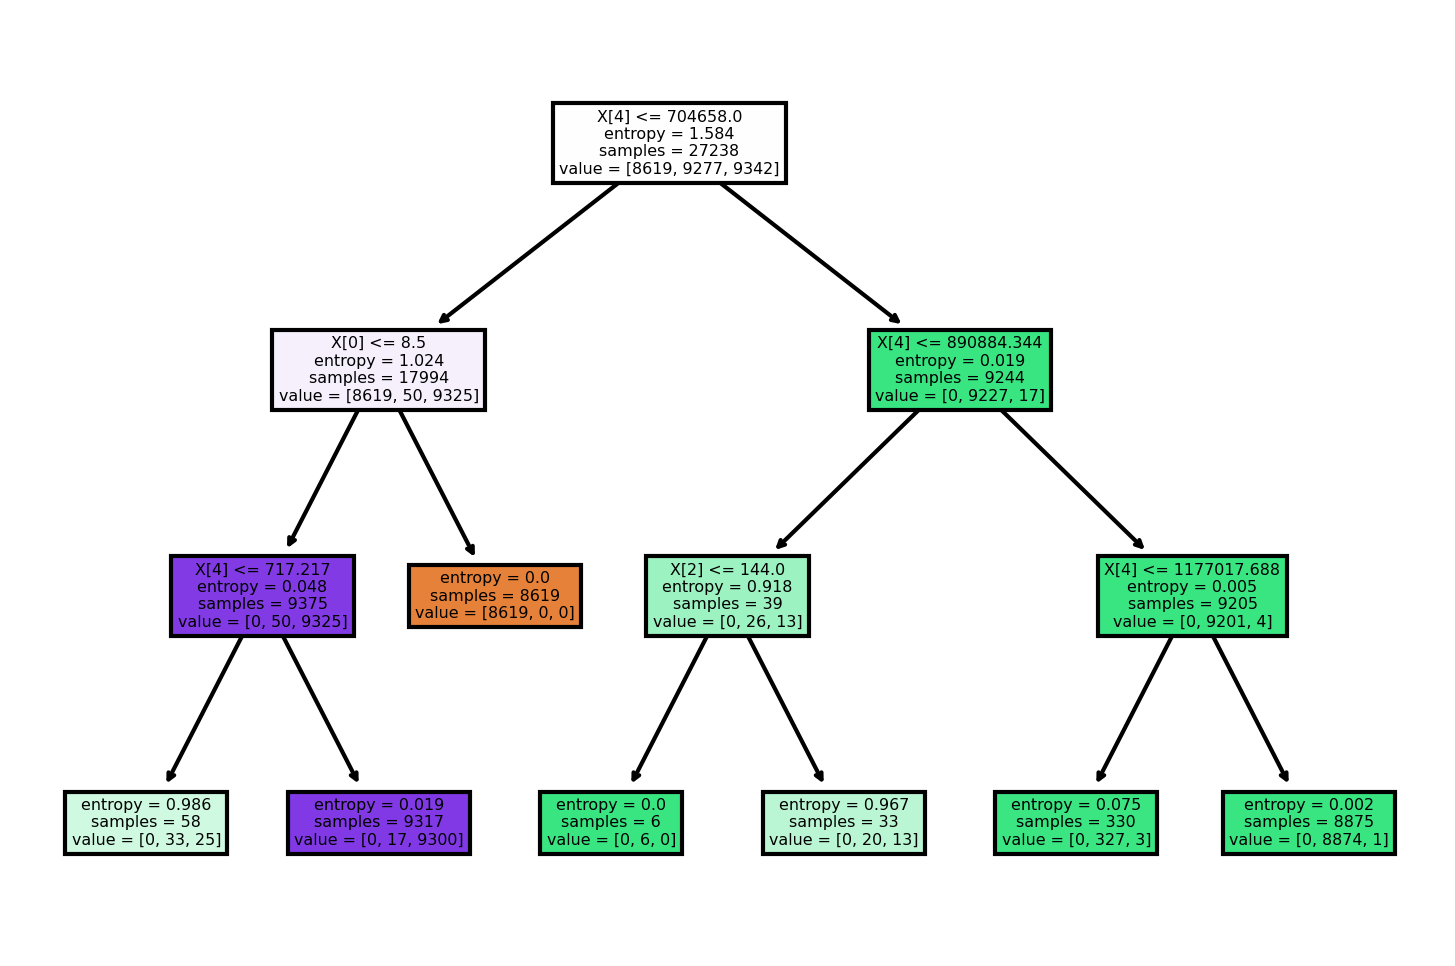

In [ ]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure()
plot_tree(tree_entropy, filled=True)
plt.show()

#### **Explorando as regras de classificação**

In [ ]:
print("Para Regra 1: avg_distance <= 704658 & file_handles > 8.5")
print("FP:", len(dataset.query('avg_distance <= 704658 & file_handles > 8.5 & pattern_description == "FP"')))
print("SS:", len(dataset.query('avg_distance <= 704658 & file_handles > 8.5 & pattern_description == "SS"')))
print("SC:", len(dataset.query('avg_distance <= 704658 & file_handles > 8.5 & pattern_description == "SC"')))

Para Regra 1: avg_distance <= 704658 & file_handles > 8.5
FP: 12405
SS: 0
SC: 0


In [ ]:
print("Para Regra 2: avg_distance <= 704658 & avg_distance <= 717.217 & file_handles <= 8.5")
print("SC:", len(dataset.query('avg_distance <= 704658 & file_handles <= 8.5  & avg_distance <= 717.217 & pattern_description == "SC"')))
print("SS:", len(dataset.query('avg_distance <= 704658 & file_handles <= 8.5  & avg_distance <= 717.217 & pattern_description == "SS"')))
print("FP:", len(dataset.query('avg_distance <= 704658 & file_handles <= 8.5  & avg_distance <= 717.217 & pattern_description == "FP"')))

Para Regra 2: avg_distance <= 704658 & avg_distance <= 717.217 & file_handles <= 8.5
SC: 41
SS: 28
FP: 0


In [ ]:
print("Para Regra 3: avg_distance <= 704658 & avg_distance > 717.217 & file_handles <= 8.5 ")
print("SS:", len(dataset.query('avg_distance <= 704658 & file_handles <= 8.5  & avg_distance > 717.217 & pattern_description == "SS"')))
print("SC:", len(dataset.query('avg_distance <= 704658 & file_handles <= 8.5  & avg_distance > 717.217 & pattern_description == "SC"')))
print("FP:", len(dataset.query('avg_distance <= 704658 & file_handles <= 8.5  & avg_distance > 717.217 & pattern_description == "FP"')))

Para Regra 3: avg_distance <= 704658 & avg_distance > 717.217 & file_handles <= 8.5 
SS: 13197
SC: 28
FP: 0


In [ ]:
print("Para Regra 4: avg_distance > 704658 & avg_distance <= 890884.344 & min_request_size <= 144")
print("SC:", len(dataset.query('avg_distance > 704658 & avg_distance <= 890884.344 & min_request_size <= 144 & pattern_description == "SC"')))
print("SS:", len(dataset.query('avg_distance > 704658 & avg_distance <= 890884.344 & min_request_size <= 144 & pattern_description == "SS"')))
print("FP:", len(dataset.query('avg_distance > 704658 & avg_distance <= 890884.344 & min_request_size <= 144 & pattern_description == "FP"')))

Para Regra 4: avg_distance > 704658 & avg_distance <= 890884.344 & min_request_size <= 144
SC: 7
SS: 0
FP: 0


In [ ]:
print("Para Regra 5: avg_distance > 704658 & avg_distance <= 890884.344 & min_request_size > 144")
print("SC:", len(dataset.query('avg_distance > 704658 & avg_distance <= 890884.344 & min_request_size > 144 & pattern_description == "SC"')))
print("SS:", len(dataset.query('avg_distance > 704658 & avg_distance <= 890884.344 & min_request_size > 144 & pattern_description == "SS"')))
print("FP:", len(dataset.query('avg_distance > 704658 & avg_distance <= 890884.344 & min_request_size > 144 & pattern_description == "FP"')))

Para Regra 5: avg_distance > 704658 & avg_distance <= 890884.344 & min_request_size > 144
SC: 30
SS: 19
FP: 0


In [ ]:
print("Para Regra 6: avg_distance > 890884.344 & avg_distance < 1177017.688")
print("SC:", len(dataset.query('avg_distance > 890884.344 & avg_distance < 1177017.688 & pattern_description == "SC"')))
print("SS:", len(dataset.query('avg_distance > 890884.344 & avg_distance < 1177017.688 & pattern_description == "SS"')))
print("FP:", len(dataset.query('avg_distance > 890884.344 & avg_distance < 1177017.688 & pattern_description == "FP"')))

Para Regra 6: avg_distance > 890884.344 & avg_distance < 1177017.688
SC: 483
SS: 5
FP: 0


In [ ]:
print("Para Regra 7: avg_distance > 1177017.688")
print("SC:", len(dataset.query('avg_distance > 1177017.688 & pattern_description == "SC"')))
print("SS:", len(dataset.query('avg_distance > 1177017.688 & pattern_description == "SS"')))
print("FP:", len(dataset.query('avg_distance > 1177017.688 & pattern_description == "FP"')))

Para Regra 7: avg_distance > 1177017.688
SC: 12668
SS: 1
FP: 0


## **Índice de Gini** 

#### **Treinamento e predição**

In [ ]:
#clf = DecisionTreeClassifier(max_depth=4, min_samples_split=40)
tree_gini = DecisionTreeClassifier(max_depth=3)
tree_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
tree_gini.predict(X_test)

array(['SC', 'SS', 'SC', ..., 'SS', 'SS', 'FP'], dtype=object)

#### **Medição da acurácia**

In [ ]:
y_test_true = y_test
y_test_pred = tree_gini.predict(X_test)
print(f"Acurácia do Teste: {round(accuracy_score(y_test_true, y_test_pred), 4)}")

Acurácia do Teste: 0.9981


#### **Plotando a árvore**

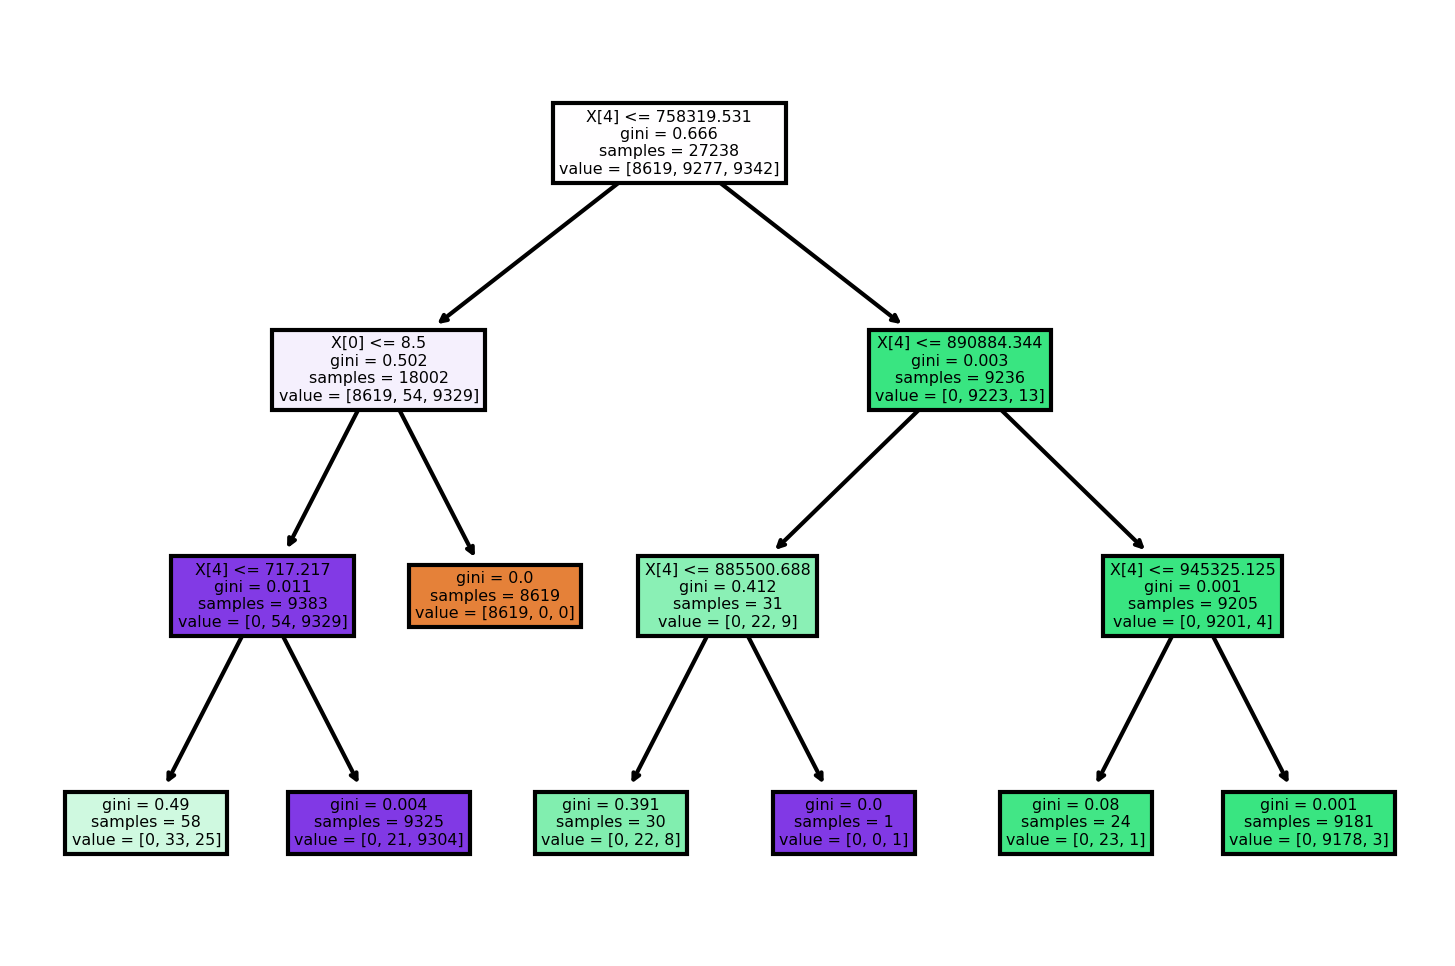

In [ ]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure()
plot_tree(tree_gini, filled=True)
plt.show()

#### **Explorando as regras de classificação**

In [ ]:
print("Para Regra 1: avg_distance <= 758319.531 & file_handles > 8.5")
print("FP:", len(dataset.query('avg_distance <= 758319.531 & file_handles > 8.5 & pattern_description == "FP"')))
print("SS:", len(dataset.query('avg_distance <= 758319.531 & file_handles > 8.5 & pattern_description == "SS"')))
print("SC:", len(dataset.query('avg_distance <= 758319.531 & file_handles > 8.5 & pattern_description == "SC"')))

Para Regra 1: avg_distance <= 758319.531 & file_handles > 8.5
FP: 12405
SS: 0
SC: 0


In [ ]:
print("Para Regra 2: avg_distance <= 758319.531 & avg_distance <= 717.217 & file_handles <= 8.5")
print("SC:", len(dataset.query('avg_distance <= 758319.531 & file_handles <= 8.5  & avg_distance <= 717.217 & pattern_description == "SC"')))
print("SS:", len(dataset.query('avg_distance <= 758319.531 & file_handles <= 8.5  & avg_distance <= 717.217 & pattern_description == "SS"')))
print("FP:", len(dataset.query('avg_distance <= 758319.531 & file_handles <= 8.5  & avg_distance <= 717.217 & pattern_description == "FP"')))

Para Regra 2: avg_distance <= 758319.531 & avg_distance <= 717.217 & file_handles <= 8.5
SC: 41
SS: 28
FP: 0


In [ ]:
print("Para Regra 3: avg_distance <= 758319.531 & avg_distance > 717.217 & file_handles <= 8.5 ")
print("SS:", len(dataset.query('avg_distance <= 758319.531 & file_handles <= 8.5  & avg_distance > 717.217 & pattern_description == "SS"')))
print("SC:", len(dataset.query('avg_distance <= 758319.531 & file_handles <= 8.5  & avg_distance > 717.217 & pattern_description == "SC"')))
print("FP:", len(dataset.query('avg_distance <= 758319.531 & file_handles <= 8.5  & avg_distance > 717.217 & pattern_description == "FP"')))

Para Regra 3: avg_distance <= 758319.531 & avg_distance > 717.217 & file_handles <= 8.5 
SS: 13204
SC: 35
FP: 0


In [ ]:
print("Para Regra 4: avg_distance > 758319.531 & avg_distance <= 885500.688")
print("SC:", len(dataset.query('avg_distance > 758319.531 & avg_distance <= 890884.344 & avg_distance <= 885500.688 & pattern_description == "SC"')))
print("SS:", len(dataset.query('avg_distance > 758319.531 & avg_distance <= 890884.344 & avg_distance <= 885500.688 & pattern_description == "SS"')))
print("FP:", len(dataset.query('avg_distance > 758319.531 & avg_distance <= 890884.344 & avg_distance <= 885500.688 & pattern_description == "FP"')))

Para Regra 4: avg_distance > 758319.531 & avg_distance <= 885500.688
SC: 30
SS: 11
FP: 0


In [ ]:
print("Para Regra 5: avg_distance > 885500.688 & avg_distance <= 890884.344")
print("SC:", len(dataset.query('avg_distance > 758319.531 & avg_distance <= 890884.344 & avg_distance > 885500.688 & pattern_description == "SC"')))
print("SS:", len(dataset.query('avg_distance > 758319.531 & avg_distance <= 890884.344 & avg_distance > 885500.688 & pattern_description == "SS"')))
print("FP:", len(dataset.query('avg_distance > 758319.531 & avg_distance <= 890884.344 & avg_distance > 885500.688 & pattern_description == "FP"')))

Para Regra 5: avg_distance > 885500.688 & avg_distance <= 890884.344
SC: 0
SS: 1
FP: 0


In [ ]:
print("Para Regra 6: avg_distance > 890884.344 & avg_distance < 945325.125")
print("SC:", len(dataset.query('avg_distance > 890884.344 & avg_distance < 945325.125 & pattern_description == "SC"')))
print("SS:", len(dataset.query('avg_distance > 890884.344 & avg_distance < 945325.125 & pattern_description == "SS"')))
print("FP:", len(dataset.query('avg_distance > 890884.344 & avg_distance < 945325.125 & pattern_description == "FP"')))

Para Regra 6: avg_distance > 890884.344 & avg_distance < 945325.125
SC: 33
SS: 1
FP: 0


In [ ]:
print("Para Regra 7: avg_distance > 945325.125")
print("SC:", len(dataset.query('avg_distance > 945325.125 & pattern_description == "SC"')))
print("SS:", len(dataset.query('avg_distance > 945325.125 & pattern_description == "SS"')))
print("FP:", len(dataset.query('avg_distance > 945325.125 & pattern_description == "FP"')))

Para Regra 7: avg_distance > 945325.125
SC: 13118
SS: 5
FP: 0
